In [17]:
import pandas as pd 
from clustering_helpers import * 


Xtrain = pd.read_hdf('C:/Users/Maria/Desktop/Work/Projects/MIMIC/Representation-Clustering/patient_clustering_EHR/data/train_test_set.h5', key='Xtrain') 
ytrain = pd.read_hdf('C:/Users/Maria/Desktop/Work/Projects/MIMIC/Representation-Clustering/patient_clustering_EHR/data/train_test_set.h5', key='ytrain') 

Xtest = pd.read_hdf('C:/Users/Maria/Desktop/Work/Projects/MIMIC/Representation-Clustering/patient_clustering_EHR/data/train_test_set.h5', key='Xtest') 
ytest = pd.read_hdf('C:/Users/Maria/Desktop/Work/Projects/MIMIC/Representation-Clustering/patient_clustering_EHR/data/train_test_set.h5', key='ytest') 

list_of_features = list(Xtrain.drop(['hours_in', 'hours_in_', 'subject_id', 'hadm_id', 'icustay_id'], axis=1).columns)


Xtrain.set_index(['subject_id', 'hadm_id', 'icustay_id'], inplace=True)
Xtest.set_index(['subject_id', 'hadm_id', 'icustay_id'], inplace=True)
Xtrain.head()


print("creating stats...")
labs_vitals_stats = Xtrain.groupby(['subject_id', 'hadm_id', 'icustay_id']).agg(['mean'])
labs_vitals_stats.columns = ['_'.join(col) for col in labs_vitals_stats.columns]

Xtest_ = Xtest.groupby(['subject_id', 'hadm_id', 'icustay_id']).agg(['mean'])
Xtest_.columns = ['_'.join(col) for col in Xtest.columns]

#Xtest_ = Xtest_.fillna(0)
Xtest_.head()


print("scaling")

scaler = StandardScaler()
scaler.fit(labs_vitals_stats)
X_train = scaler.transform(labs_vitals_stats)
Xtest_ = scaler.transform(Xtest_)

X_train = pd.DataFrame(X_train, columns=labs_vitals_stats.columns, index=labs_vitals_stats.index)
X_train.head()

creating stats...
scaling


,,,Alanine aminotransferase_mean,Albumin_mean,Albumin ascites_mean,Albumin pleural_mean,Albumin urine_mean,Alkaline phosphate_mean,Asparate aminotransferase_mean,Basophils_mean,Bilirubin_mean,"CO2 (ETCO2, PCO2, etc.)_mean",...,Prothrombin time INR_mean,Prothrombin time PT_mean,Red blood cell count_mean,Respiratory rate_mean,Sodium_mean,Systolic blood pressure_mean,Temperature_mean,Troponin-I_mean,White blood cell count_mean,pH urine_mean
subject_id,hadm_id,icustay_id,,,,,,,,,,,,,,,,,,,,,
186,131447,262532,-0.199047,-0.523696,-0.049507,-0.049507,-0.049507,-0.385323,-0.213863,-0.247675,-0.257119,0.606257,...,-0.615263,-0.748427,-0.346156,0.069785,-0.468124,0.130011,0.227804,-0.076319,-0.661642,2.213202
214,131505,262581,-0.199047,-0.523696,-0.049507,-0.049507,-0.049507,-0.385323,-0.213863,1.747272,-0.257119,0.957204,...,0.225389,0.337650,0.547931,-1.568335,0.001578,-1.150762,-0.782600,-0.076319,0.355069,1.881058
245,131562,262627,0.423501,1.747822,-0.049507,-0.049507,-0.049507,0.523159,1.409891,-0.247675,0.427670,0.819698,...,0.413811,0.487561,-1.753604,-0.591913,-0.319896,-1.002216,0.411222,-0.076319,1.197342,-0.443943
281,131639,262685,-0.199047,2.139463,-0.049507,-0.049507,-0.049507,-0.385323,-0.213863,-0.247675,-0.257119,1.083861,...,0.055921,0.165776,0.319786,1.845918,1.368670,0.153964,0.156995,-0.076319,0.869251,0.220343
307,131708,262730,-0.168089,0.985710,-0.049507,-0.049507,-0.049507,0.478143,-0.139148,-0.247675,-0.063980,0.991507,...,-0.436875,-0.448876,-0.208748,0.588546,0.061530,0.919401,0.316043,-0.076319,2.374504,-0.443943


In [18]:
Xtest_

array([[-0.19904698, -0.52369587, -0.04950738, ...,  3.90647718,
        -0.18184166,  0.08748599],
       [-0.17847514, -0.52369587, -0.04950738, ..., -0.0763195 ,
        -1.08588666, -0.44394289],
       [-0.19904698,  1.56999547, -0.04950738, ..., -0.0763195 ,
        -0.03557053, -0.44394289],
       ...,
       [-0.19904698, -0.52369587, -0.04950738, ..., -0.0763195 ,
         1.09108632, -0.44394289],
       [-0.19904698, -0.52369587, -0.04950738, ..., -0.0763195 ,
        -0.81393501, -0.44394289],
       [-0.19904698, -0.52369587, -0.04950738, ..., -0.0763195 ,
         0.1246867 , -0.44394289]])

In [8]:
!pip install xgboost
from xgboost import XGBClassifier
from matplotlib import pyplot

You are using pip version 19.0.3, however version 22.0.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
!pip install imbalanced-learn

You are using pip version 19.0.3, however version 22.0.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [33]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

counter = Counter(ytrain)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, ytrain.values)
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({0: 298, 1: 111})
Counter({0: 298, 1: 298})


In [32]:
ytrain

subject_id
29495    0
59344    1
40877    0
98196    1
2406     0
        ..
14069    1
52296    0
1581     0
83557    0
281      1
Name: mort_icu, Length: 409, dtype: int64

[15:46:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


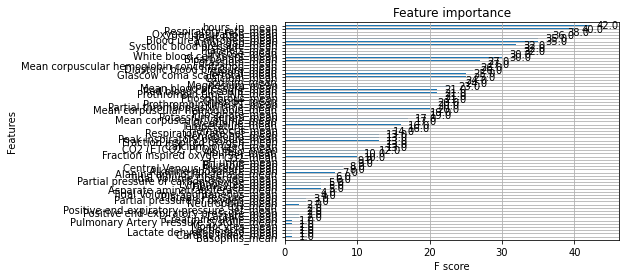

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      2679
           1       0.31      0.23      0.26      1217

    accuracy                           0.60      3896
   macro avg       0.50      0.50      0.49      3896
weighted avg       0.57      0.60      0.58      3896



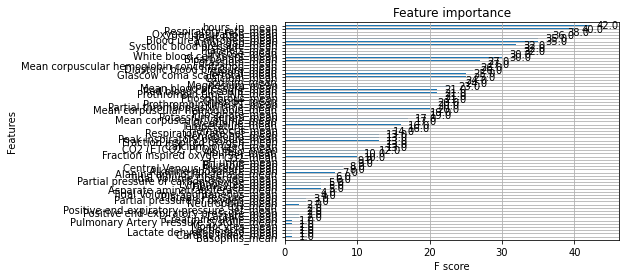

In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from matplotlib import pyplot as plt

# fit model no training data
model = XGBClassifier()

model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()
pred = model.predict(Xtest_)
#print('Mean ROC AUC: %.5f' % np.mean(scores))
print(classification_report(ytest, pred))
from xgboost import plot_importance
plot_importance(model)
pyplot.show()



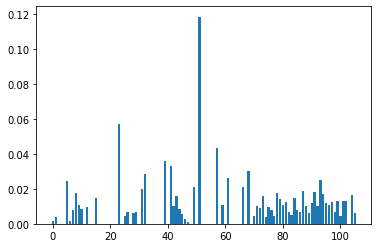

In [44]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [52]:
feimp = pd.DataFrame(model.feature_importances_, index=X_train.columns)
feimp.T

,Alanine aminotransferase_mean,Albumin_mean,Albumin ascites_mean,Albumin pleural_mean,Albumin urine_mean,Alkaline phosphate_mean,Asparate aminotransferase_mean,Basophils_mean,Bilirubin_mean,"CO2 (ETCO2, PCO2, etc.)_mean",...,Prothrombin time INR_mean,Prothrombin time PT_mean,Red blood cell count_mean,Respiratory rate_mean,Sodium_mean,Systolic blood pressure_mean,Temperature_mean,Troponin-I_mean,White blood cell count_mean,pH urine_mean
0,0.001579,0.004018,0.0,0.0,0.0,0.024549,0.001586,0.008069,0.017646,0.011031,...,0.01082,0.012427,0.006806,0.012868,0.004644,0.013276,0.012777,0.0,0.016346,0.005912


In [27]:
from sklearn.model_selection import GridSearchCV
# define model
model = XGBClassifier()
# define grid
weights = [ 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, ytrain)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[15:35:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.574772 using {'scale_pos_weight': 1000}
0.574772 (0.097111) with: {'scale_pos_weight': 1000}
